[[1.         0.6        0.6        ... 0.         0.         0.        ]
 [0.6        1.         0.6        ... 0.         0.         0.        ]
 [0.6        0.6        1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.77777778 0.63636364]
 [0.         0.         0.         ... 0.77777778 1.         0.81818182]
 [0.         0.         0.         ... 0.63636364 0.81818182 1.        ]]


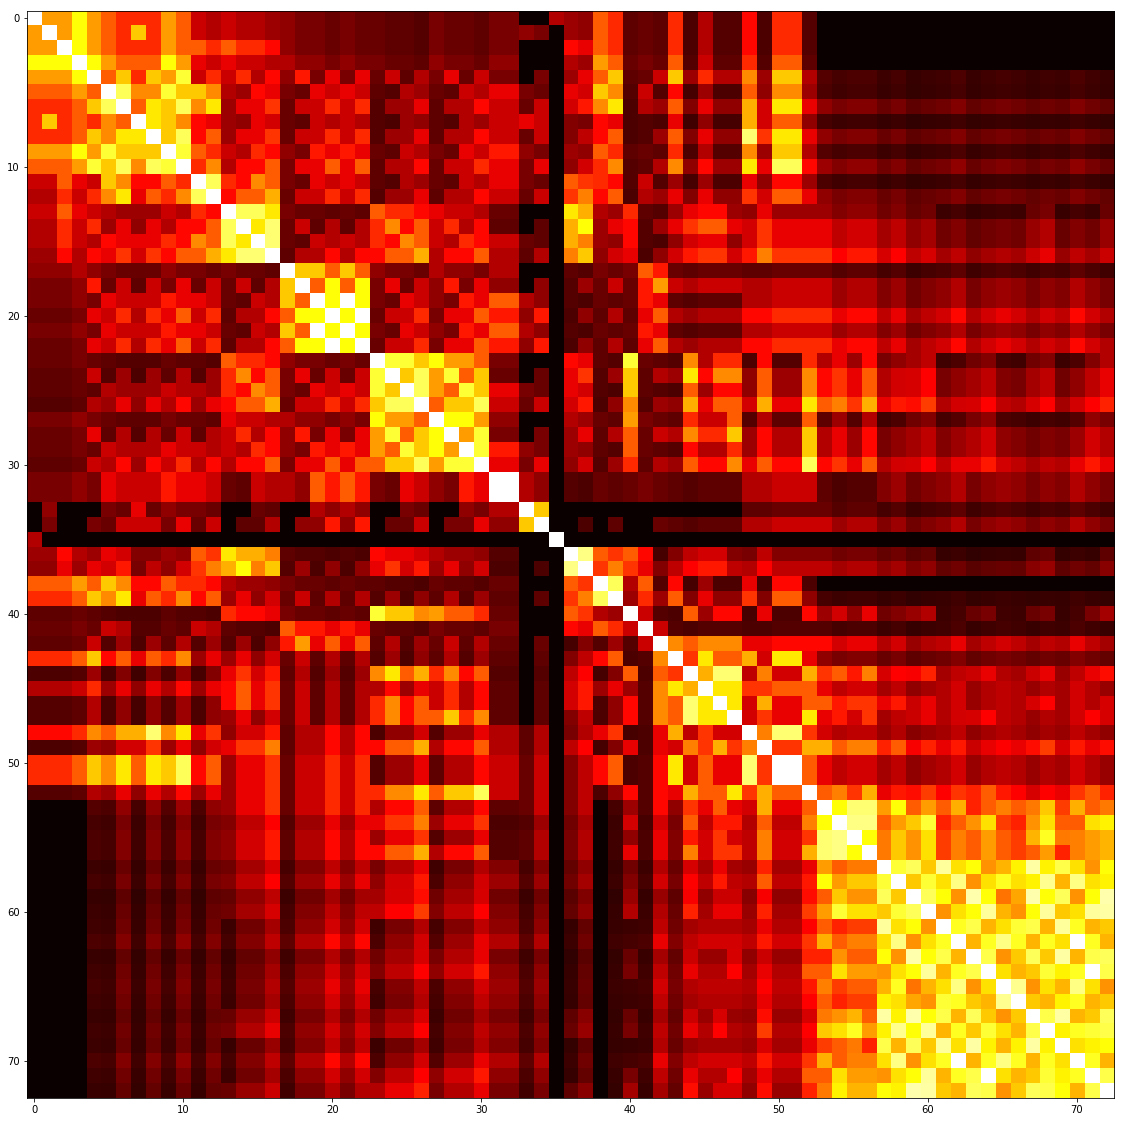

In [15]:
from data_repo import ipa_data
import numpy as np
import matplotlib.pyplot as plt

ipa_features = ipa_data['features']
row_count, feature_count = ipa_features.shape

# similarity(X, Y) = F[f(X intersec Y) / (f(X intersec Y) + f(X - Y) + f(Y - X))]
similarity = np.zeros((row_count, row_count))
pos_features = ipa_features == 1
feature_mask = ipa_features != 1
for i in range(row_count):
    x = pos_features[i]
    x_intersec_y = np.logical_and(x, pos_features)
    x_minus_y = np.logical_and(x, feature_mask)
    
    for j in range(row_count):   # j is the enumerator of y
        intersec_sum = np.sum(x_intersec_y[j])
        x_minus_y_sum = np.sum(x_minus_y[j])
        cur_y = pos_features[j]
        x_mask = x != 1
        y_minus_x = np.logical_and(cur_y, x_mask)
        cur_similarity =  intersec_sum / (intersec_sum + x_minus_y_sum + np.sum(y_minus_x))
        
        similarity[i, j] = cur_similarity

print(similarity)
fig = plt.figure(figsize=(20,20))
plt.imshow(similarity, cmap='hot', interpolation='nearest')
plt.show()